# Upright pendulum

In [1]:
import numpy as np
from scipy.integrate import odeint
import pandas as pd
import warnings
pd.set_option('display.float_format', '{:0.8f}'.format)
import operator

In [2]:
from sklearn.preprocessing import FunctionTransformer


def sin_transformer(period):
    return FunctionTransformer(lambda x: np.sin(x / period * 2 * np.pi))


def cos_transformer(period):
    return FunctionTransformer(lambda x: np.cos(x / period * 2 * np.pi))

In [3]:
# hour_df["hour_sin"] = sin_transformer(24).fit_transform(hour_df)["hour"]
# hour_df["hour_cos"] = cos_transformer(24).fit_transform(hour_df)["hour"]

Upright Pendulum link

https://www.12000.org/my_notes/cart_motion/report.htm

In [93]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define parameters
m_c = 1.0  # Mass of the cart (kg)
m_p = 0.1  # Mass of the pendulum (kg)
l = 0.5    # Length of the pendulum (m)
g = 9.81   # Acceleration due to gravity (m/s^2)

# Define the right-hand side of the system of ODEs
def rhs(t, y, F):
    x, u, theta, omega = y
    a = m_p * l
    b = m_c + m_p
    dxdt = u
    dudt = (F / m_c) - ((a * omega ** 2 * np.sin(theta) + g * np.sin(theta) * np.cos(theta)) / (b * np.sin(theta) ** 2 + m_c / m_p))
    dthetadt = omega
    domegadt = (-g * np.sin(theta) - (a * omega ** 2 * np.sin(theta) * np.cos(theta) + b * g * np.sin(theta)) / (l * (b * np.sin(theta) ** 2 + m_c / m_p))) / np.cos(theta)
    return [dxdt, dudt, dthetadt, domegadt]

# Initial conditions
y0 = [0.0, 0.0, np.pi / 4, 0.0]  # [x0, u0, theta0, omega0]

# Time span
t_span = (0.0, 10.0)  # from 0 to 10 seconds

# External force (if any)
F = 0.0  # set external force to 0

# Solve the ODEs
sol = solve_ivp(rhs, t_span, y0, args=(F,), t_eval=np.linspace(t_span[0], t_span[1], 1000))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(sol.t, sol.y[0], label='Cart Position (x)')
plt.plot(sol.t, sol.y[2], label='Pendulum Angle (theta)')
plt.xlabel('Time (s)')
plt.ylabel('Position (m) / Angle (rad)')
plt.title('Upright Pendulum on Moving Cart')
plt.legend()
plt.grid(True)
plt.show()

## Corrected formulation

### Non-rational system

- Note that we are not considering damping as part of our formulation

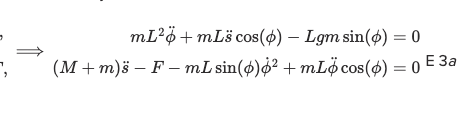

## Rational- system

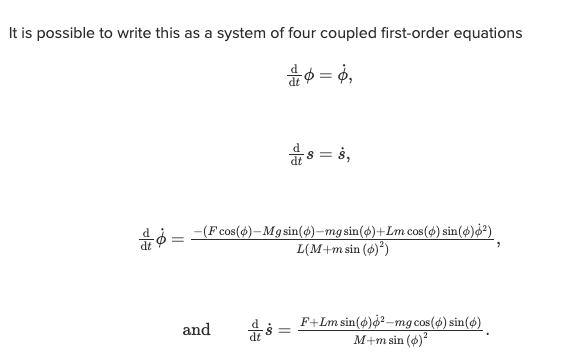

In [94]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define parameters
m_c = 1.0  # Mass of the cart (kg)
m_p = 1  # Mass of the pendulum (kg)
l = 1    # Length of the pendulum (m)
g = 9.81   # Acceleration due to gravity (m/s^2)



# Initial conditions
y0 = [0.0, 0.0, np.pi / 4, 0.0]  # [x0, u0, theta0, omega0]

# Time span
t_span = (0.0, 4)  # from 0 to 10 seconds

# External force (if any)
F = 0.0  # set external force to 0

# Solve the ODEs
sol = solve_ivp(rhs, t_span, y0, args=(F,), t_eval=np.linspace(t_span[0], t_span[1], 1000))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(sol.t, sol.y[0], label='Cart Position (x)')
plt.plot(sol.t, sol.y[2], label='Pendulum Angle (theta)')
plt.xlabel('Time (s)')
plt.ylabel('Position (m) / Angle (rad)')
plt.title('Upright Pendulum on Moving Cart')
plt.legend()
plt.grid(True)
plt.show()

In [95]:
IC_df = pd.read_csv("parameters/init_cond_pend.csv")

In [96]:
IC_df

In [97]:
params_df = pd.read_csv("parameters/pend_param.csv")
params_df


In [98]:
g = 9.81   # Acceleration due to gravity (m/s^2)


### Synthesizing data from different ICs

In [99]:
# Define the right-hand side of the system of ODEs
def pendulum_rhs(t, y, m_c, m_p, l, F):
    x, u, theta, omega = y
    # a = m_p * l
    b = m_c + m_p
    
    dxdt = u

    dudt = (F+ l*m_p*np.sin(theta)*omega**2 - m_p*g*np.cos(theta)*np.sin(theta))/(m_c + m_p*(np.sin(theta))**2)
        
    # (F / m_c) - ((a * omega ** 2 * np.sin(theta) + g * np.sin(theta) * np.cos(theta)) / (b * np.sin(theta) ** 2 + m_c / m_p))
    dthetadt = omega

    domegadt = -(F*np.cos(theta) - b*g*np.sin(theta) + l*m_p*np.cos(theta)*np.sin(theta)*(omega**2))/(l*(m_c + m_p*(np.sin(theta))**2))
    
    # (-g * np.sin(theta) - (a * omega ** 2 * np.sin(theta) * np.cos(theta) + b * g * np.sin(theta)) / (l * (b * np.sin(theta) ** 2 + m_c / m_p))) / np.cos(theta)
    
    return [dxdt, dudt, dthetadt, domegadt]

In [133]:
F =0.0 # Force acting on the cart. 

# Time span
t_span = (0.0, 6)  # from 0 to 10 seconds
#Valuation points
t_eval_ = np.linspace(t_span[0], t_span[1], 1000)
data_matrix_df_list = []


for param_index in params_df.index:
    params = params_df.loc[param_index]
    # Define parameters
    m_c = params['m_c']  # Mass of the cart (kg)
    m_p = params['m_p']  # Mass of the pendulum (kg)
    l = params['l']    # Length of the pendulum (m)
    for IC_index in IC_df.index:
        IC = IC_df.loc[IC_index]
        y0 = IC.values
        # Solve the ODEs
        sol = solve_ivp(pendulum_rhs, t_span, y0, args=(m_c, m_p, l, F), t_eval=t_eval_)
        sol_df = pd.DataFrame(sol.y.T, columns=IC.keys())
        data_matrix_df_list.append(sol_df)
        # if IC_index == 0:
        #     # Plot the results
        #     plt.figure(figsize=(10, 6))
        #     plt.plot(sol.t, sol.y[0], label='Cart Position (x)')
        #     plt.plot(sol.t, sol.y[2], label='Pendulum Angle (theta)')
        #     plt.xlabel('Time (s)')
        #     plt.ylabel('Position (m) / Angle (rad)')
        #     plt.title('Upright Pendulum on Moving Cart')
        #     plt.legend()
        #     plt.grid(True)
        #     plt.show()

data_matrix_df = pd.concat(data_matrix_df_list, ignore_index=True)
data_matrix_df

In [135]:
data_matrix_df_list[0].plot()

### Calculating the derivatives of data

In [136]:
from dae_finder import der_matrix_calculator

In [137]:
delta_t = t_eval_[1]- t_eval_[0]
data_matrix_features = data_matrix_df_list[0].columns
for ind, data_matrix_ in enumerate(data_matrix_df_list):
    derr_matrix = der_matrix_calculator(data_matrix_, delta_t)
    data_matrix_df_list[ind] = pd.concat([data_matrix_.iloc[:-1], derr_matrix], axis=1)

data_matrix_df_appended = pd.concat(data_matrix_df_list, ignore_index=True)
data_matrix_df_appended

In [138]:
data_matrix_df = data_matrix_df_appended[data_matrix_features]
data_matrix_df = pd.concat([data_matrix_df, data_matrix_df_appended[["d(u) /dt"]]], axis=1)
data_matrix_df

## Forming candiate library

In [139]:
from sklearn.preprocessing import FunctionTransformer
from copy import deepcopy

def sin_transformer(period):
    return FunctionTransformer(lambda x: np.sin(x / period * 2 * np.pi))


def cos_transformer(period):
    return FunctionTransformer(lambda x: np.cos(x / period * 2 * np.pi))


data_matrix_df_with_trig = deepcopy(data_matrix_df)
data_matrix_df_with_trig["sin(theta)"] = sin_transformer(1).fit_transform(data_matrix_df_with_trig)["theta"]
data_matrix_df_with_trig["cos(theta)"] = cos_transformer(1).fit_transform(data_matrix_df_with_trig)["theta"]

In [140]:
data_matrix_df_with_trig

In [141]:
from dae_finder import PolyFeatureMatrix

poly_feature_ob = PolyFeatureMatrix(2)

candidate_lib_full = poly_feature_ob.fit_transform(data_matrix_df_with_trig)

In [142]:
candidate_lib_full

## Testing dynamics finding 

In [143]:
refined_candid_lib = candidate_lib_full.drop(['1'], axis=1)
# refined_candid_lib = pd.concat([refined_candid_lib, dummy_der[['d(omega) /dt']]], axis=1)

In [144]:
refined_candid_lib

## Refined candidate library is able to find the model 

In [155]:
from dae_finder import sequentialThLin

seq_th_model = sequentialThLin(fit_intercept=False, coef_threshold=0.2)

seq_th_model.fit(X=refined_candid_lib,  y=data_matrix_df_appended['d(omega) /dt'])

In [156]:
dict(zip(seq_th_model.feature_names_in_, seq_th_model.coef_))

#### Using lasso

In [147]:
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler(with_std=True, with_mean=False)
scaled_cand_lib = pd.DataFrame(s_scaler.fit_transform(refined_candid_lib), columns=s_scaler.feature_names_in_)

In [148]:
plt.plot(refined_candid_lib['d(u) /dt'][-990:], data_matrix_df_appended['d(omega) /dt'][-990:])

In [149]:
data_matrix_df_appended[["d(u) /dt", "d(omega) /dt"]][:900].plot()

In [150]:
data_matrix_df_appended["d(omega) /dt"]+refined_candid_lib["d(u) /dt cos(theta)"] - g*refined_candid_lib["sin(theta)"]

In [151]:
refined_candid_lib["d(u) /dt cos(theta)"] - refined_candid_lib["d(u) /dt"] * refined_candid_lib["cos(theta)"]

In [120]:
from sklearn.linear_model import Lasso
alg_lasso = Lasso(fit_intercept=False)
alg_lasso.fit(X=scaled_cand_lib,  y=data_matrix_df_appended['d(omega) /dt'])

In [121]:
dict(zip(alg_lasso.feature_names_in_, alg_lasso.coef_))

In [185]:
plt.plot(dummy_der["d(theta) /dt"], data_matrix_df_list[0]["omega"][:999])

In [184]:
(dummy_der["d(theta) /dt"] - data_matrix_df_list[0]["omega"][:999]).hist()

In [182]:
data_matrix_df_list[0]["u"][:999].hist()